In [26]:
%pip install kagglehub pandas seaborn matplotlib scipy

  Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_arm64.whl (20.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/medilin/ironhack/projects/week_5/lab-eda-bivariate/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set the path to the file you'd like to load
file_path = "amz_uk_price_prediction_dataset.csv"

# Load the latest version
amazon_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "asaniczka/uk-optimal-product-price-prediction",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
amazon_df

/var/folders/9x/t81_t1w14_s8w2jy_nx_xn4m0000gn/T/ipykernel_74625/3490437511.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  amazon_df = kagglehub.load_dataset(


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1

In [14]:
crosstab = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller'])
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [19]:
# Compute the total products per category
totals = crosstab.sum(axis=1)
totals

category
3D Printers                         248
3D Printing & Scanning             4067
Abrasive & Finishing Products       250
Action Cameras                     1697
Adapters                            254
                                  ...  
Wind Instruments                    250
Window Treatments                   239
Women                             17772
Women's Sports & Outdoor Shoes     1959
eBook Readers & Accessories         246
Length: 296, dtype: int64

In [23]:

# Compute the proportion of bestsellers per category
bestseller_proportion = crosstab[True] / totals * 100
bestseller_proportion.sort_values(ascending=False)

category
Grocery                             5.813467
Smart Home Security & Lighting      5.769231
Health & Personal Care              5.768628
Mobile Phone Accessories            4.247104
Power & Hand Tools                  3.533895
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

1) no, the maximum proportion of best seller is less than 6% by category

In [ ]:

# Perform Chi-square test of independence between isBestSeller and category
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller'])

# Perform chi-square test
_, p_value, _, _ = chi2_contingency(contingency_table)

print(f"p-value: {p_value}")

p-value: 0.0


In [ ]:
from scipy.stats.contingency import association

association(contingency_table, method = 'cramer')

0.1222829439760564

2) there is a very low association



3) Visualization

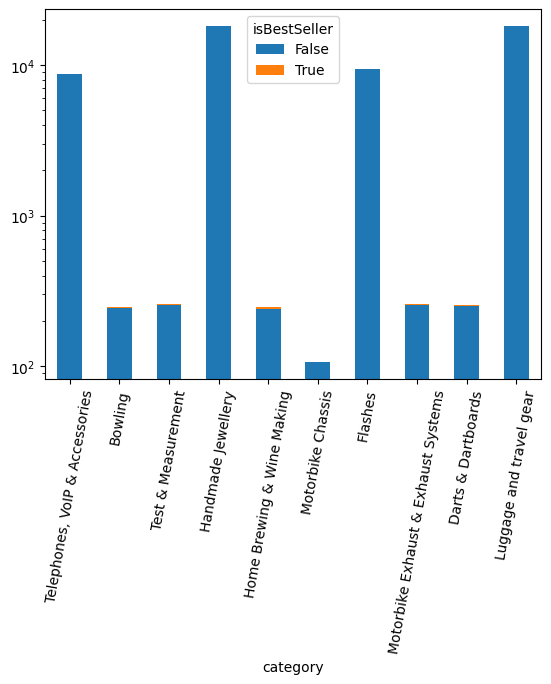

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Select 10 random categories without replacement
random_categories = np.random.choice(contingency_table.index, size=10, replace=False)

# Subset the table to those categories
subset_table = contingency_table.loc[random_categories]
subset_table.plot(kind='bar', stacked=True, logy=True, rot=80)
plt.show()

---
# Part 2

0) Preliminary Step: Remove outliers in product prices

In [44]:
def amazon_df_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1 # calculate the IQR (Interquartile Range)
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers (filtering with the lower and upper bounds)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [50]:
amazon_outliers_series = amazon_df_outliers(amazon_df['price'])

1) Violin plots

In [ ]:
top_20_categories = amazon_df['category'].value_counts().nlargest(20).index
top_20_categories_df = amazon_df[amazon_df['category'].isin(top_20_categories)]

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


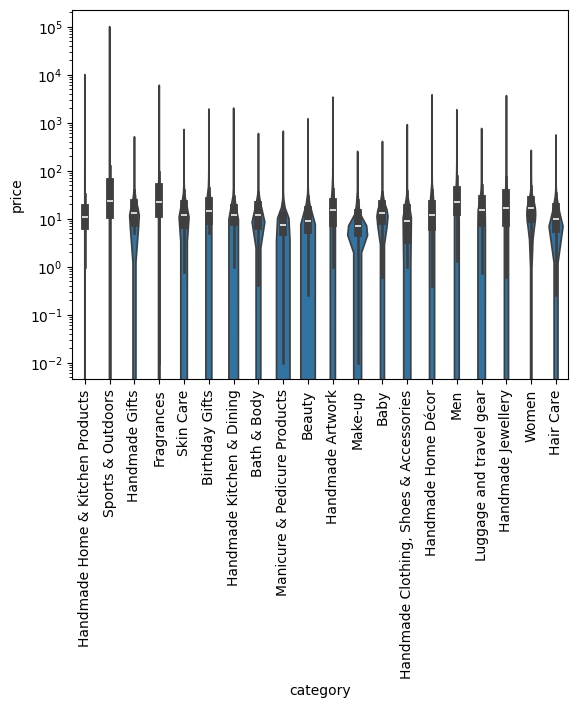

In [60]:
sns.violinplot(x='category', y='price', data=top_20_categories_df)
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Show the plot
plt.show()

In [66]:

# Calculate median price by category
median_price_by_category = amazon_df.groupby('category')['price'].median()

# sort descending and filtering to top 1
median_price_by_category.sort_values(ascending=False).head(1)

category
Laptops    1042.725
Name: price, dtype: float64

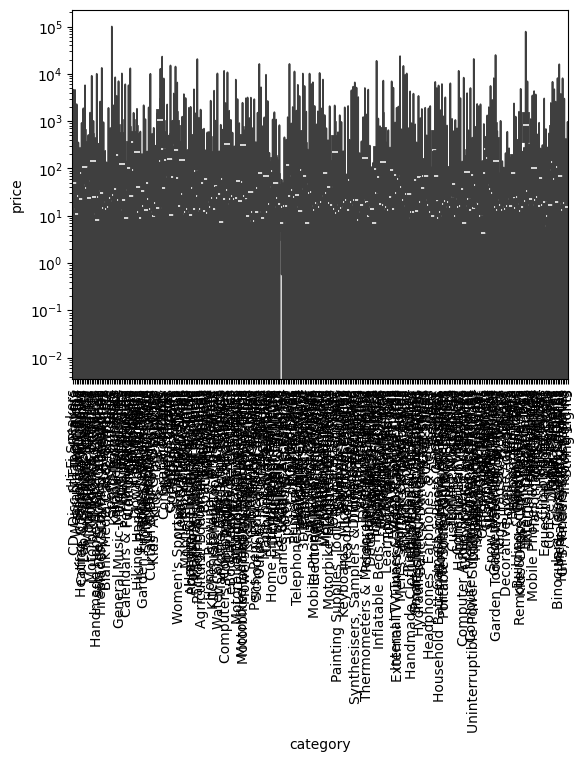

In [67]:
sns.violinplot(x='category', y='price', data=amazon_df)
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Show the plot
plt.show()

2) Bar charts

In [68]:
top_10_categories = amazon_df['category'].value_counts().nlargest(10).index
top_10_categories_df = amazon_df[amazon_df['category'].isin(top_10_categories)]

<Axes: xlabel='category'>

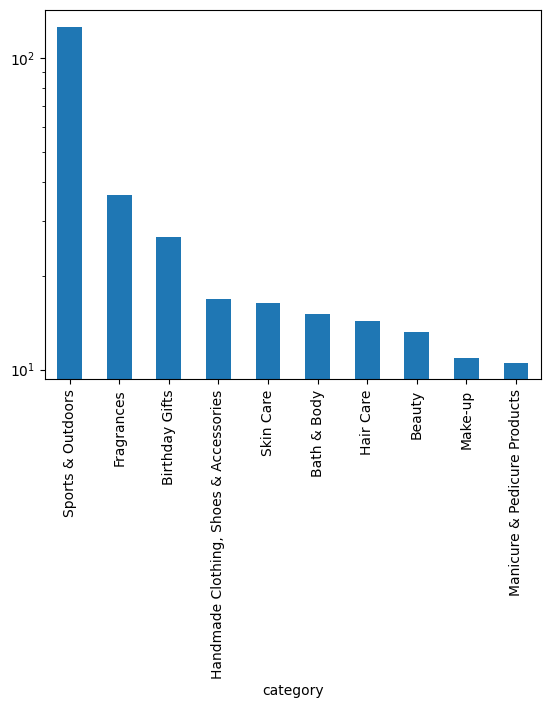

In [69]:
mean_price_cat_df = top_10_categories_df.groupby('category')['price'].mean().sort_values(ascending=False)
mean_price_cat_df.plot(kind='bar', logy=True)

In [70]:
amazon_df.groupby('category')['price'].mean().sort_values(ascending=False).head(1)

category
Laptops    1087.987827
Name: price, dtype: float64

3) Box plots

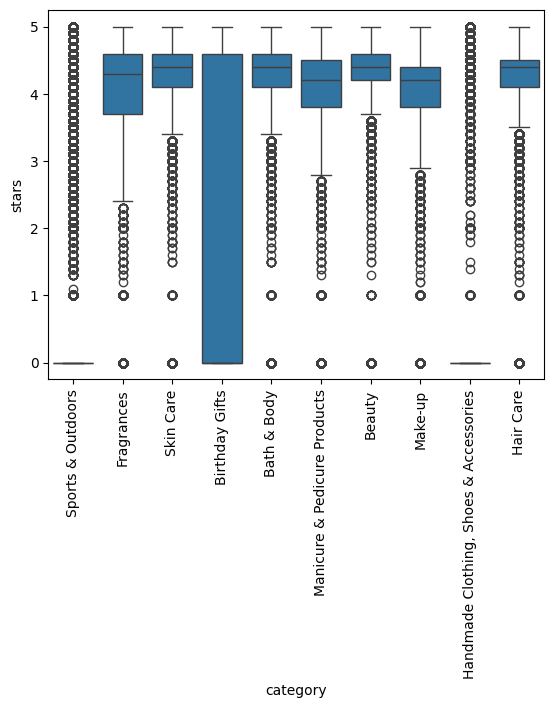

In [72]:
sns.boxplot(x='category', y='stars', data=top_10_categories_df)
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

In [84]:
top10_highest_mean_ratings_list = amazon_df.groupby('category')['stars'].mean().sort_values(ascending=False).head(10).index
top10_highest_mean_ratings_list
top10_mean_ratings_df = amazon_df[amazon_df['category'].isin(top10_highest_mean_ratings_list)]

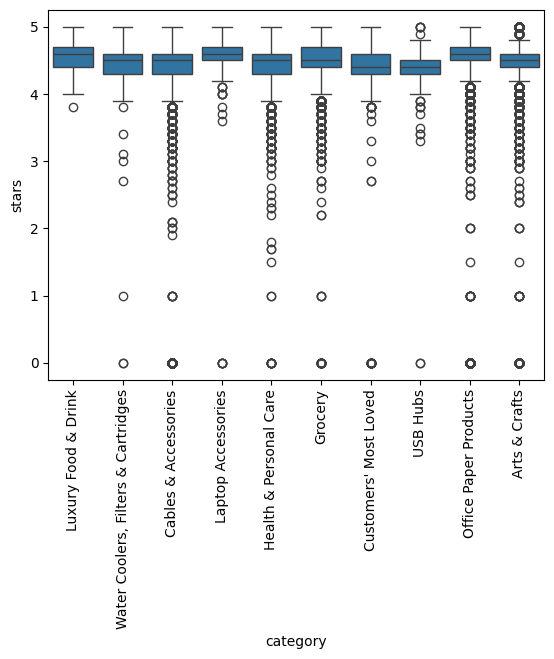

In [85]:
sns.boxplot(x='category', y='stars', data=top10_mean_ratings_df)
# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

---
# Part 3
1) Correlation Coefficients

In [86]:

# Calculate correlation coefficient between price and stars
correlation = amazon_df['price'].corr(amazon_df['stars'])
correlation

np.float64(-0.12490673262149324)

there is a very weak negative linear relationship: as price increases, average star rating tends to decrease slightly, but the effect is minimal.

2) Visualizations

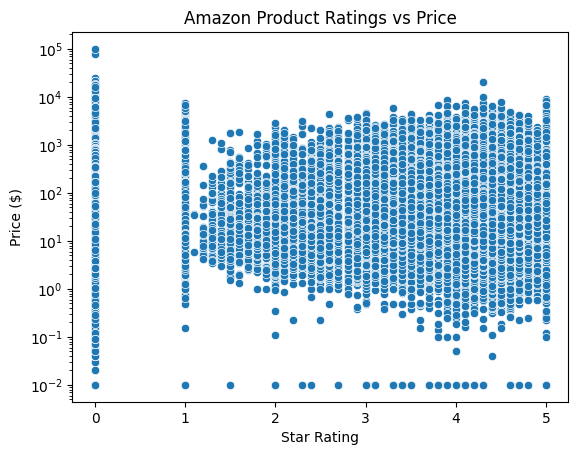

In [88]:

# Create scatter plot of stars vs price
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=amazon_df, x='stars', y='price')
plt.title('Amazon Product Ratings vs Price')
plt.xlabel('Star Rating')
plt.ylabel('Price ($)')
plt.yscale('log')
plt.show()

Observations: Pattern in Ratings vs. Price

1. **No Strong Correlation Between Price and Rating**  
   Products at every price point—from a few cents up to tens of thousands of dollars—span the full spectrum of star ratings. In other words, **higher price does not guarantee a higher rating**, and **lower price does not guarantee a lower rating**.

2. **Clustering of High Ratings (3–5 Stars)**  
   Despite the wide price range, the majority of products receive ratings between **3 and 5 stars**, regardless of cost. There are  
   - Many inexpensive products (< \$1) with 4–5 stars.  
   - Many mid-range products (\$10 – \$1,000) with 4–5 stars.  
   - A smaller but noticeable number of very expensive products (> \$1,000) with high ratings.

Put simply, **customer satisfaction (as measured by star rating) appears largely independent of price**. The most common ratings are in the upper-middle range (3–5 stars) across all price tiers, indicating that factors other than price—such as product quality, brand reputation, and user expectations—play a larger role in determining ratings.

2) Visualizations

In [ ]:
amazon_df

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [ ]:
df_numerical = amazon_df[amazon_df['price', 'stars', 'reviews', 'boughtInLastMonth']]
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()